In [20]:
# Loading necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed data
data = pd.read_csv('..\data\merged_and_filled_data.csv')
print("Data loaded successfully.")

Data loaded successfully.


In [21]:
# Basic Data Overview
print("Data Types and Missing Values:\n")
print(data.info())
print("\nSummary Statistics:\n")
print(data.describe())

Data Types and Missing Values:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94952 entries, 0 to 94951
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          94952 non-null  int64  
 1   question_id         94952 non-null  int64  
 2   ability             94952 non-null  float64
 3   difficulty          94952 non-null  float64
 4   answered_correctly  94952 non-null  bool   
 5   year                94952 non-null  int64  
dtypes: bool(1), float64(2), int64(3)
memory usage: 3.7 MB
None

Summary Statistics:

         student_id   question_id       ability    difficulty          year
count  94952.000000  94952.000000  94952.000000  94952.000000  94952.000000
mean    1026.786587     24.313400      0.154334      0.034510   2021.526297
std      576.761461     13.822756      2.316471      1.113018      0.499311
min        1.000000      1.000000     -5.751698     -2.157522   2021.000000
25


Missing values per column:
 student_id            0
question_id           0
ability               0
difficulty            0
answered_correctly    0
year                  0
dtype: int64


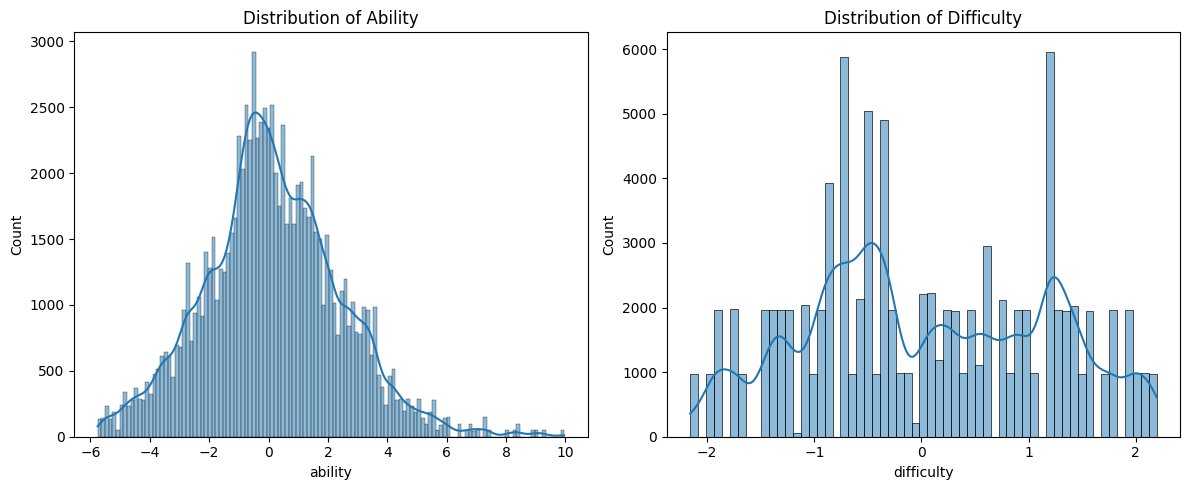

In [22]:
# Checking for Missing Values
missing_values = data.isnull().sum()
print("\nMissing values per column:\n", missing_values)

# Cell 3: Distribution Analysis - Ability and Difficulty
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['ability'], kde=True)
plt.title("Distribution of Ability")

plt.subplot(1, 2, 2)
sns.histplot(data['difficulty'], kde=True)
plt.title("Distribution of Difficulty")

plt.tight_layout()
plt.show()

C:\Users\Rmkmr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\Rmkmr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


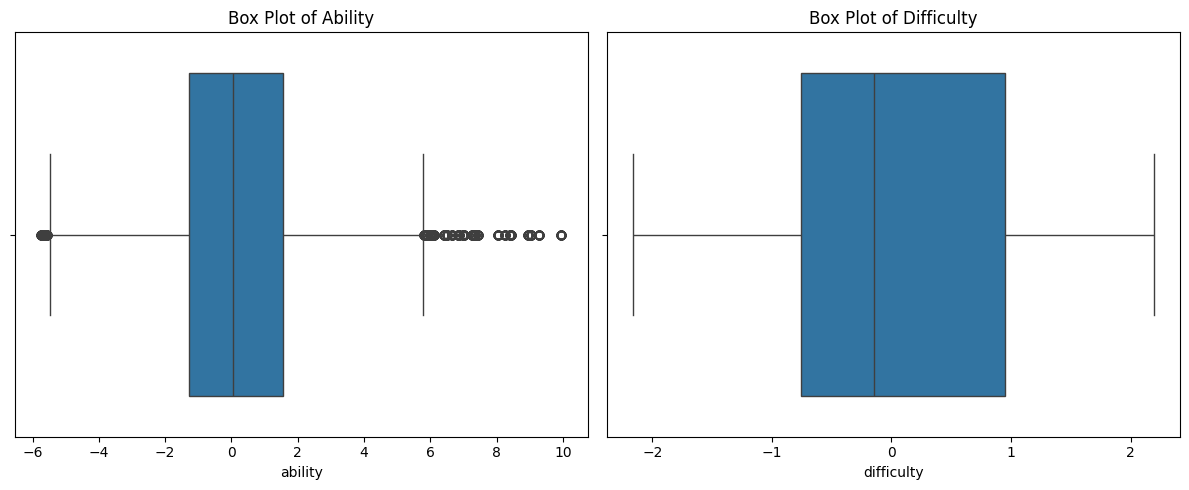

In [23]:
# Box Plots for Outlier Detection
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=data['ability'])
plt.title("Box Plot of Ability")

plt.subplot(1, 2, 2)
sns.boxplot(x=data['difficulty'])
plt.title("Box Plot of Difficulty")

plt.tight_layout()
plt.show()

In [24]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['ability'].quantile(0.25)
Q3 = data['ability'].quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers_count = data[(data['ability'] < lower_bound) | (data['ability'] > upper_bound)].shape[0]

print(f"Count of outliers in the 'ability' column: {outliers_count}")

Count of outliers in the 'ability' column: 1551


# Note: In this code, we calculated the first quartile (Q1) and the third quartile (Q3) of the 'ability' column to determine the interquartile range (IQR). We then used the IQR to establish lower and upper bounds for identifying outliers. The count of outliers found in the 'ability' column was printed. While I chose not to remove the outliers at this stage, I plan to revisit this decision after building the model and assess any potential impact on model performance.

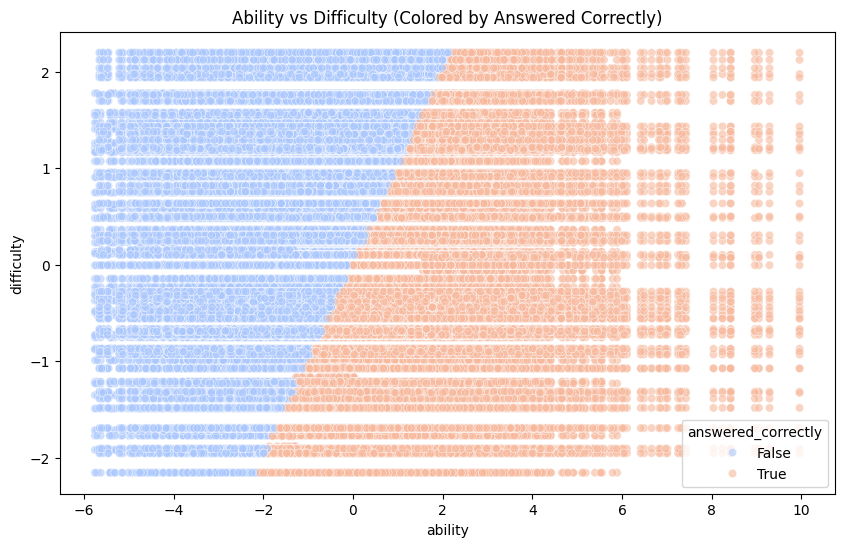

In [25]:
# Relationship Analysis - Ability vs Difficulty by Answered Correctly
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='ability', y='difficulty', hue='answered_correctly', palette='coolwarm', alpha=0.6)
plt.title("Ability vs Difficulty (Colored by Answered Correctly)")
plt.show()

# Note: This scatter plot visualizes the relationship between student ability and question difficulty, with points colored based on whether the question was answered correctly. The analysis revealed that as the difficulty of questions increases, the number of incorrect answers rises, indicating that higher difficulty levels are associated with more false responses. Additionally, a decrease in student ability correlates with an increase in incorrect answers, suggesting that students with lower ability levels struggle more with the questions.

In [26]:
data.corr()

,student_id,question_id,ability,difficulty,answered_correctly,year
student_id,1.000000,0.078033,0.069095,0.067081,0.020488,0.865723
question_id,0.078033,1.000000,0.006735,0.968167,-0.373908,0.090202
ability,0.069095,0.006735,1.000000,0.004502,0.690101,0.080658
difficulty,0.067081,0.968167,0.004502,1.000000,-0.385211,0.077516
answered_correctly,0.020488,-0.373908,0.690101,-0.385211,1.000000,0.019142
year,0.865723,0.090202,0.080658,0.077516,0.019142,1.000000


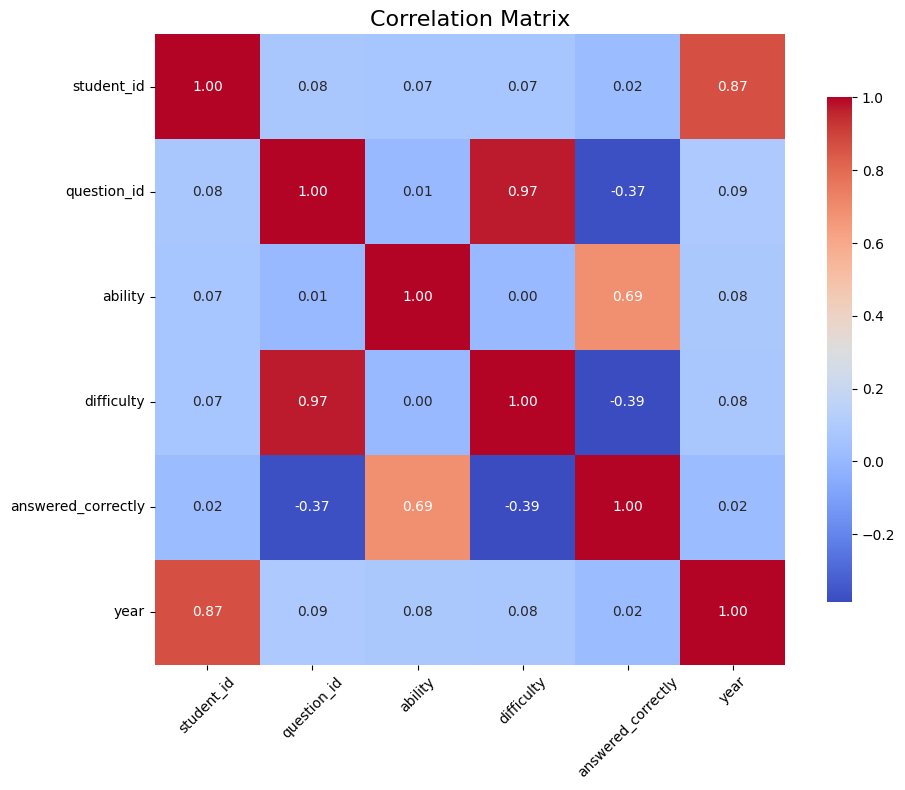

In [27]:
# Calculating the correlation matrix
correlation_matrix = data.corr()

# Setting the size of the plot
plt.figure(figsize=(10, 8))

# Creating a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Adding titles and labels
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Displaying the plot
plt.tight_layout()
plt.show()

In [28]:
data.groupby('question_id').count()

,student_id,ability,difficulty,answered_correctly,year
question_id,,,,,
1,2000,2000,2000,2000,2000
2,2000,2000,2000,2000,2000
3,2000,2000,2000,2000,2000
4,2000,2000,2000,2000,2000
5,2000,2000,2000,2000,2000
6,2000,2000,2000,2000,2000
7,1998,1998,1998,1998,1998
8,2000,2000,2000,2000,2000
9,2000,2000,2000,2000,2000


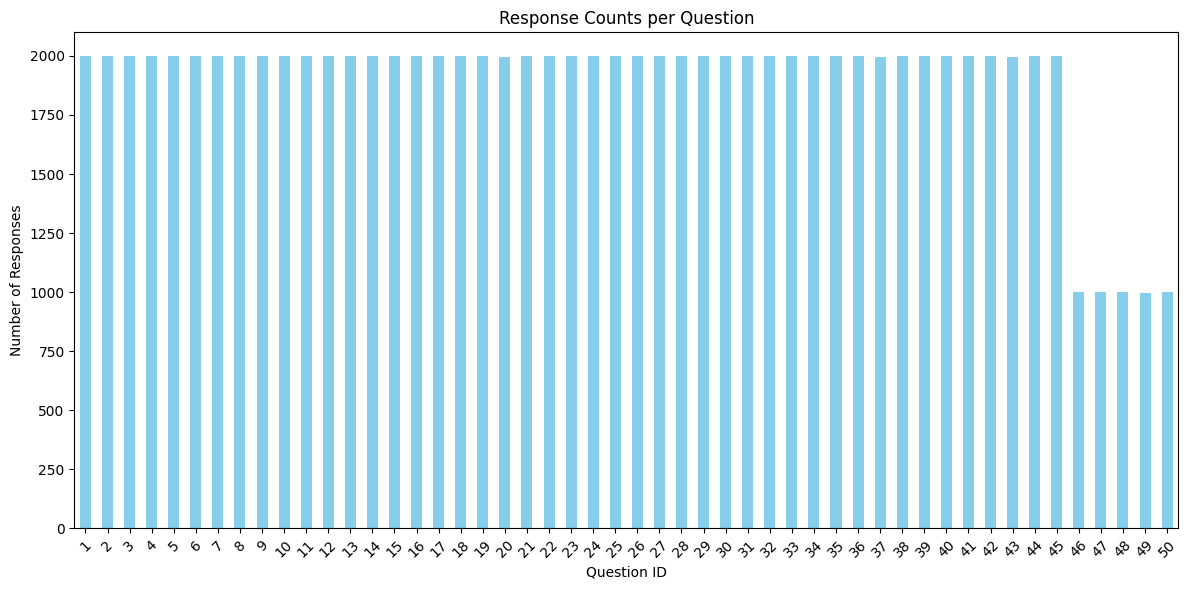

In [29]:
import matplotlib.pyplot as plt

# Grouping by question_id and counting responses
question_counts = data.groupby('question_id')['student_id'].count()

# Plotting the counts
plt.figure(figsize=(12, 6))
question_counts.plot(kind='bar', color='skyblue')
plt.title('Response Counts per Question')
plt.xlabel('Question ID')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Note: This bar chart displays the number of responses received for each question, grouped by question ID. The visualization indicates which questions had the most engagement from students, with all questions typically receiving around 2000 responses, except for the last four questions (IDs 47-50), which showed significantly lower response counts. This discrepancy suggests potential issues with these questions, such as increased difficulty or time constraints affecting student participation.

In [30]:
# Assuming your data is in a DataFrame called 'data'
# Filter for the last four questions
last_four_questions = data[data['question_id'].isin([47, 48, 49, 50])]

# Grouping by 'question_id' to see the count of attempts and correctness
attempted_stats = last_four_questions.groupby(['question_id', 'answered_correctly']).size().unstack(fill_value=0)

# Displaying the results
print("Attempted Statistics for the Last Four Questions:")
print(attempted_stats)

# Additional analysis: see who attempted these questions
# Getting the unique student IDs who attempted each of the last four questions
students_attempted = last_four_questions.groupby('question_id')['student_id'].unique()

# Displaying the unique student IDs for each question
print("\nStudents Attempted the Last Four Questions:")
for question_id, students in students_attempted.items():
    print(f"Question {question_id}: {len(students)} students")
    
# Analyzing who answered correctly and incorrectly
correct_stats = last_four_questions[last_four_questions['answered_correctly'] == 1].groupby('question_id').count()
incorrect_stats = last_four_questions[last_four_questions['answered_correctly'] == 0].groupby('question_id').count()

print("\nCorrect Answer Statistics:")
print(correct_stats[['student_id']])  # Count of students who answered correctly

print("\nIncorrect Answer Statistics:")
print(incorrect_stats[['student_id']])  # Count of students who answered incorrectly


Attempted Statistics for the Last Four Questions:
answered_correctly  False  True 
question_id                     
47                    783    216
48                    772    228
49                    794    203
50                    804    196

Students Attempted the Last Four Questions:
Question 47: 999 students
Question 48: 1000 students
Question 49: 997 students
Question 50: 1000 students

Correct Answer Statistics:
             student_id
question_id            
47                  216
48                  228
49                  203
50                  196

Incorrect Answer Statistics:
             student_id
question_id            
47                  783
48                  772
49                  794
50                  804


# Note: This code analyzes the last four questions (IDs 47 to 50) in the dataset. It first calculates the attempted statistics, showing how many students answered each question correctly and incorrectly. The results indicate a significant number of incorrect responses, particularly for these questions. Additionally, the code retrieves and displays the number of unique students who attempted each of the last four questions, highlighting potential issues with these questions due to the lower response rates and the counts of correct and incorrect answers. This analysis lays the groundwork for understanding student performance and engagement on these challenging questions.

In [39]:
print(last_four_data['ability'].isnull().value_counts())

ability
False    3996
Name: count, dtype: int64


In [40]:
# creating the correctness column
last_four_data['correctness'] = last_four_data['answered_correctly'].map({True: 'Correct', False: 'Incorrect'})


C:\Users\Rmkmr\AppData\Local\Temp\ipykernel_22340\2417636221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_four_data['correctness'] = last_four_data['answered_correctly'].map({True: 'Correct', False: 'Incorrect'})


In [41]:
print(last_four_data['answered_correctly'].isna().sum())


0


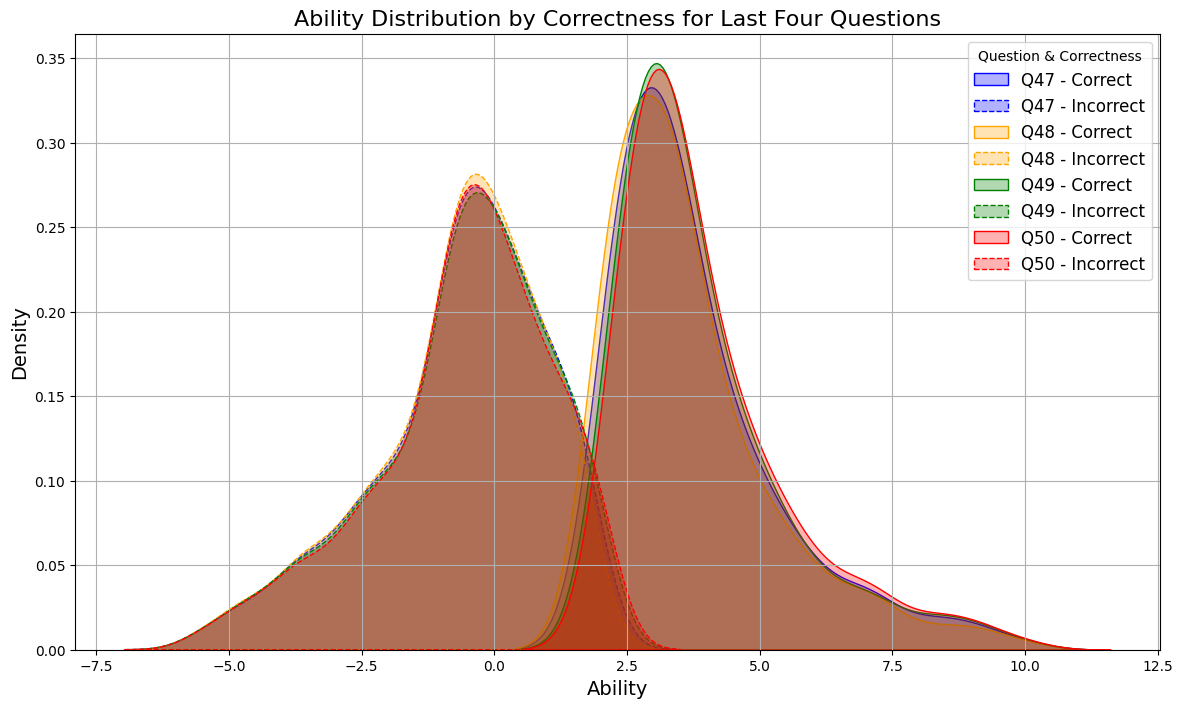

In [44]:
# Defining distinct colors for each question
colors = {
    47: 'blue',
    48: 'orange',
    49: 'green',
    50: 'red'
}

# Defining line styles for correctness
line_styles = {
    'Correct': 'solid',
    'Incorrect': 'dashed'
}

plt.figure(figsize=(14, 8))

# Iterate through each question
for question_id in [47, 48, 49, 50]:
    # Correct responses
    sns.kdeplot(
        last_four_data[(last_four_data['question_id'] == question_id) & (last_four_data['correctness'] == 'Correct')]['ability'],
        label=f'Q{question_id} - Correct',
        color=colors[question_id],
        linestyle=line_styles['Correct'],
        fill=True,
        alpha=0.3  # Lower opacity for filling
    )
    # Incorrect responses
    sns.kdeplot(
        last_four_data[(last_four_data['question_id'] == question_id) & (last_four_data['correctness'] == 'Incorrect')]['ability'],
        label=f'Q{question_id} - Incorrect',
        color=colors[question_id],
        linestyle=line_styles['Incorrect'],
        fill=True,
        alpha=0.3  # Lower opacity for filling
    )

plt.title('Ability Distribution by Correctness for Last Four Questions', fontsize=16)
plt.xlabel('Ability', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Question & Correctness', fontsize=12)
plt.grid(True)
plt.show()


# Note: This visualization displays the ability distribution of students who answered the last four questions (IDs 47 to 50) correctly and incorrectly. Each question is represented with distinct colors and line styles: solid lines for correct answers and dashed lines for incorrect ones. The area under each curve is filled with lower opacity to enhance clarity. This graph helps illustrate how the distribution of student abilities varies between those who performed well and those who struggled, providing insights into the difficulty levels of these questions and the capabilities of the responding students.

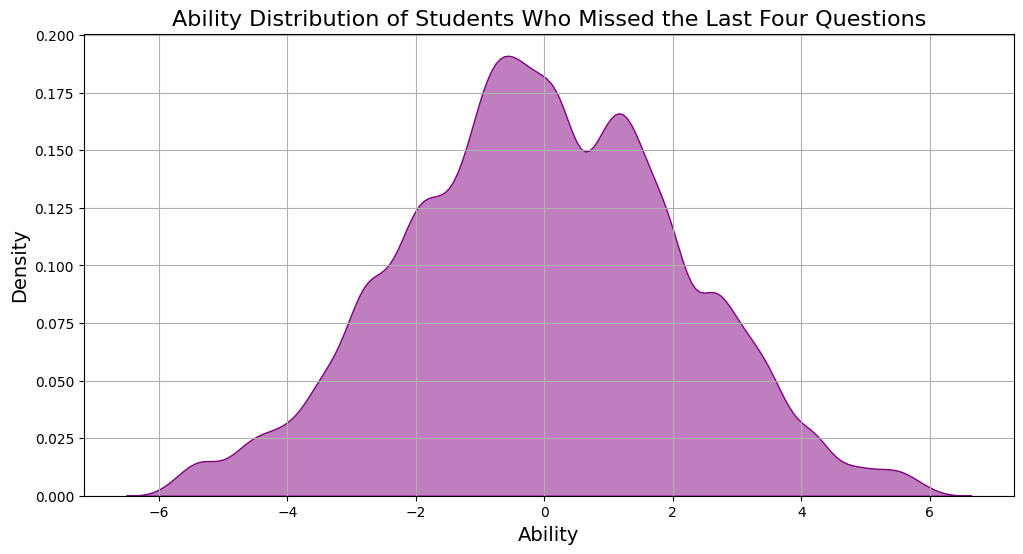

Number of students who missed the last four questions: 1000
count    44979.000000
mean        -0.042607
std          2.158629
min         -5.751698
25%         -1.494278
50%         -0.068255
75%          1.431704
max          5.889554
Name: ability, dtype: float64


In [45]:
# Get all student IDs who attempted the last four questions
attempted_students = last_four_data['student_id'].unique()

# Get all student IDs from the original dataset
all_students = data['student_id'].unique()

# Identify students who did not attempt any of the last four questions
missed_students = set(all_students) - set(attempted_students)

# Filter the original data to find the ability of the missed students
missed_students_data = data[data['student_id'].isin(missed_students)]

# Visualize the ability distribution of missed students
plt.figure(figsize=(12, 6))
sns.kdeplot(missed_students_data['ability'], fill=True, color='purple', alpha=0.5)
plt.title('Ability Distribution of Students Who Missed the Last Four Questions', fontsize=16)
plt.xlabel('Ability', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True)
plt.show()

# Optional: Print the count of missed students and their ability statistics
print(f"Number of students who missed the last four questions: {len(missed_students)}")
print(missed_students_data['ability'].describe())

# Note: In this analysis, we identify and visualize the ability distribution of students who missed attempting the last four questions (IDs 47 to 50). By comparing their abilities, we gain insights into the characteristics of this group. The KDE plot illustrates the density of abilities among these students, providing a visual understanding of their performance levels. Additionally, the count of missed students and their descriptive statistics help quantify the extent of this phenomenon and identify any trends or patterns related to their abilities. This information can further aid in assessing the impact of question difficulty and student preparedness on overall performance.

In [50]:
# Getting the unique student IDs who attempted the last four questions
students_attempted_last_four = last_four_data['student_id'].unique()


In [51]:
# Filtering the original dataset to include only those students
previous_questions_data = data[data['student_id'].isin(students_attempted_last_four)]

# Identifying the previous questions (e.g., questions 1 to 46)
previous_questions = previous_questions_data[previous_questions_data['question_id'] < 47]

# Grouping by student_id and count the number of incorrect answers
incorrect_answers_count = previous_questions.groupby('student_id')['answered_correctly'].apply(lambda x: (x == False).sum())

# Adding a new column to indicate whether they had more incorrect answers
previous_questions['incorrect_previous'] = previous_questions['student_id'].map(incorrect_answers_count)


C:\Users\Rmkmr\AppData\Local\Temp\ipykernel_22340\3862301656.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  previous_questions['incorrect_previous'] = previous_questions['student_id'].map(incorrect_answers_count)


C:\Users\Rmkmr\AppData\Local\Temp\ipykernel_22340\1123398944.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='incorrect_previous', y='ability', data=previous_questions, palette='Set2')
C:\Users\Rmkmr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Rmkmr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\Rmkmr\AppData\Local\Programs\Python\Python39

C:\Users\Rmkmr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Rmkmr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\Rmkmr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Rmkmr\AppData\Local\Programs\Python\Python39\lib

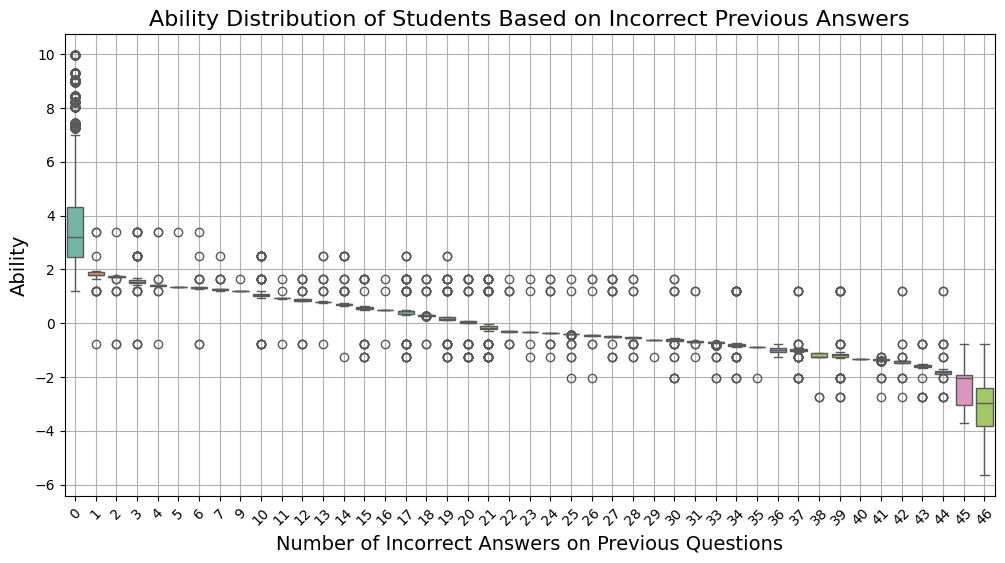

In [52]:
# Visualization: Ability vs. Incorrect Previous Answers
plt.figure(figsize=(12, 6))
sns.boxplot(x='incorrect_previous', y='ability', data=previous_questions, palette='Set2')
plt.title('Ability Distribution of Students Based on Incorrect Previous Answers', fontsize=16)
plt.xlabel('Number of Incorrect Answers on Previous Questions', fontsize=14)
plt.ylabel('Ability', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Note: This visualization uses a box plot to display the ability distribution of students based on the number of incorrect answers they provided on previous questions. The x-axis represents the count of incorrect responses, while the y-axis shows the corresponding ability levels of the students. Each box reflects the interquartile range of abilities for students in different categories of incorrect answers, with lines indicating the median ability. This plot helps illustrate how the number of previous incorrect answers correlates with students' abilities, providing insights into their performance and learning behavior. The overall trend can reveal whether students who struggle with earlier questions tend to have lower abilities, supporting the hypothesis that poor performance in earlier sections affects subsequent responses.

C:\Users\Rmkmr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


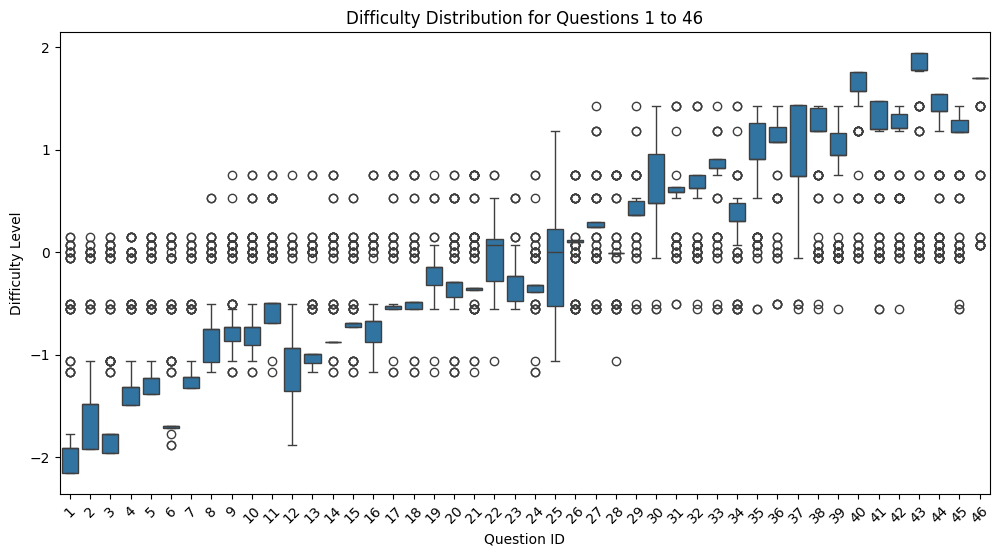

In [54]:
# Filter the data for questions leading up to the last four
earlier_questions_data = data[data['question_id'].isin(range(1, 47))]

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create a box plot for difficulty levels
sns.boxplot(x='question_id', y='difficulty', data=earlier_questions_data)
plt.title('Difficulty Distribution for Questions 1 to 46')
plt.xlabel('Question ID')
plt.ylabel('Difficulty Level')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Note: This code snippet filters the dataset to focus on questions 1 through 46 and generates a box plot to visualize the distribution of difficulty levels across these questions. The x-axis represents each question ID, while the y-axis indicates the corresponding difficulty level. The box plot showcases the median difficulty, interquartile range, and potential outliers, providing a clear view of how difficulty varies among the earlier questions. This visualization highlights the gradual increase in difficulty leading up to the last four questions, supporting the analysis of how increasing difficulty may impact students' performance and their ability to answer subsequent questions correctly.

In [55]:
data = pd.read_csv('../data/preprocessed_data.csv')

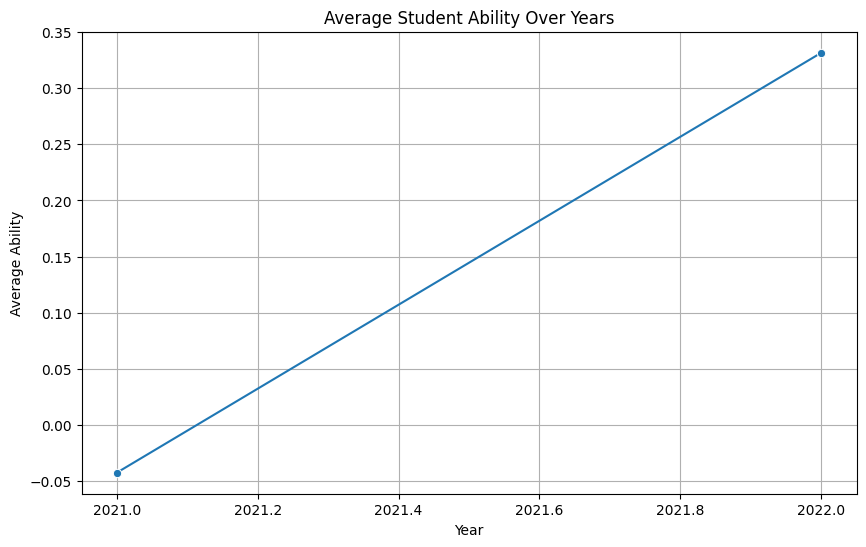

In [56]:
# Average ability by year
ability_trend = data.groupby('year')['ability'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='ability', data=ability_trend, marker='o')
plt.title("Average Student Ability Over Years")
plt.xlabel("Year")
plt.ylabel("Average Ability")
plt.grid()
plt.show()

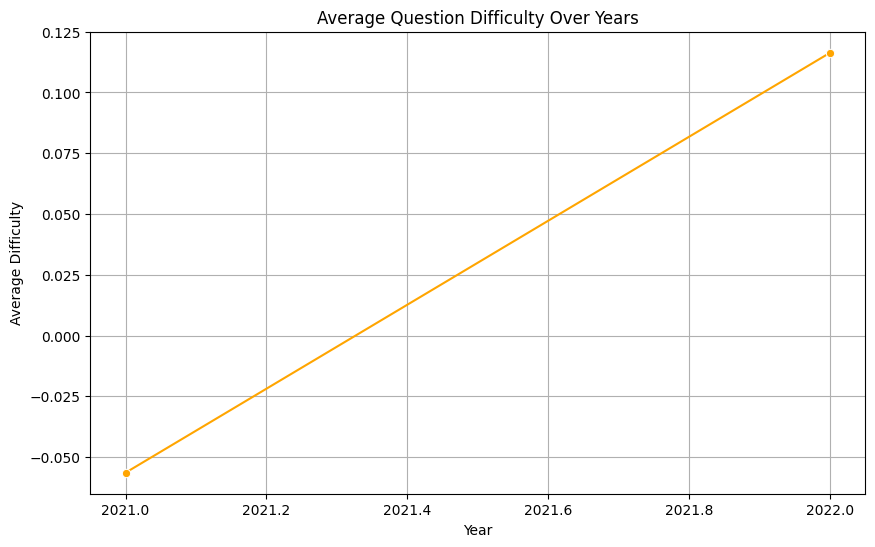

In [57]:
# Average difficulty by year
difficulty_trend = data.groupby('year')['difficulty'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='difficulty', data=difficulty_trend, marker='o', color='orange')
plt.title("Average Question Difficulty Over Years")
plt.xlabel("Year")
plt.ylabel("Average Difficulty")
plt.grid()
plt.show()

answered_correctly
1    48669
0    46283
Name: count, dtype: int64


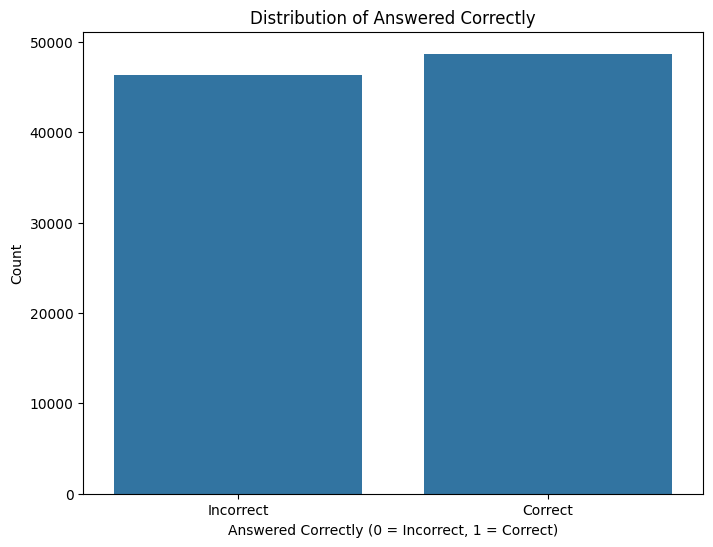

In [59]:
data = pd.read_csv('../data/preprocessed_data.csv')

target_counts = data['answered_correctly'].value_counts()
print(target_counts)

# Plotting the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='answered_correctly', data=data)
plt.title('Distribution of Answered Correctly')
plt.xlabel('Answered Correctly (0 = Incorrect, 1 = Correct)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Incorrect', 'Correct'])
plt.show()